# Title goes here

**Author:** Elimelech Berlin  
**Date:** March 2023
***

## Overview
This report analyzes available data to identify home features that have a strong correlation with home sale prices. Included in this data is information about home features such as living space, utilities ...
***

## Business Problem
Investors looking to turn a profit from flipping houses are presented with the following dilemma: With a finite amount of funds to invest per property, how should they spend their money to maximize their return? What home features are associated with an increase in home value?  
In this report I explore a given dataset to pinpoint what sort of renovations/improvements investors would be advised to spend their money on in an effort to maximize a given home's resail value.
***

## Data
The data examined in this report describes properties located in King County, Washington and comes from the King County Assessor Data Download available from the [King County Department of Assesments webpage](https://info.kingcounty.gov/assessor/DataDownload/default.aspx). (Some of the properties are located outside of the county proper).  
This dataset contains information about a variety of home/property features of about 30,000 properties. Features described include general details (location, view from the home etc.) as well as details about the actual structure and layout (square-footage, utilities etc.) of the properties.  
In creating this report the following two files were used:
* [kc house data.csv](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/kc_house_data.csv) contains the dataset 
* [column names.md](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/column_names.md) contains descriptive information about each column in the dataset
***

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Have a look at the data:

In [2]:
# load dataset from file & preview it
kc_house_data = pd.read_csv('data/kc_house_data.csv')
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
# create list of columns to ignore (drop) in this report
col_to_ignore = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long']

# drop those columns
kc_house_data.drop(col_to_ignore, axis=1, inplace=True)

In [5]:
# get a sense of the distributios of the features
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,330.211142,217.412038,1975.163953
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,285.770536,245.302792,32.067362
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,400.000000,150.000000,1977.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,510.000000,320.000000,2003.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000


In [7]:
# check for null values
kc_house_data.isna().sum()

id              0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
greenbelt       0
nuisance        0
condition       0
grade           0
heat_source     0
sewer_system    0
sqft_garage     0
sqft_patio      0
yr_built        0
dtype: int64

In [6]:
# drop rows with null values for ease of use
kc_house_data.dropna(inplace=True)

In [20]:
# check correlation of numerical features with price, in descending order
kc_house_data.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.608616
bathrooms      0.480337
sqft_patio     0.313789
bedrooms       0.288954
sqft_garage    0.263674
floors         0.180589
yr_built       0.095796
sqft_lot       0.086550
id            -0.034096
Name: price, dtype: float64

From the above output we see that square feet of living space is the feature most highly correlated with price.  
Let's view a sample of the data for that feature plotted against price.

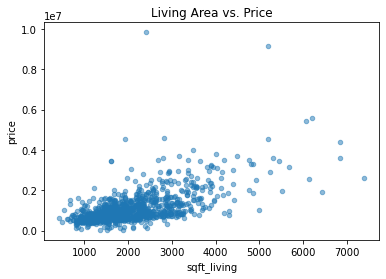

In [39]:
# plot sqft_living vs. price of a sample of the data
kc_house_data.sample(1000).plot.scatter(x='sqft_living', y='price', alpha=.5)
plt.title('Living Area vs. Price');

Let's begin linear regression

In [40]:
# set variables for the model
X = kc_house_data['sqft_living']
y = kc_house_data['price']

# create model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [41]:
# view summary of the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:15:28   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
The overall model is statistically significant with a p-value of (nearly) 0.
The R-squared value indicates that 37% of the variance in the data is explained by the sqft_living feature.  


### Coefficients Interpetation:
The coefficients for the constant and the sqft_living feature have p-values well below an alpha of 0.05, indicating statistical significance.

* A home with 0 square-feet of living space would have a sale price of $-75,590.

* The price of a home increases by $561 per each additional square-foot of living space.

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
